# **Project: Uber Data Analysis**

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Context**

Uber Technologies, Inc. is an American multinational transportation network company based in San Francisco and has operations in approximately 72 countries and 10,500 cities. In the fourth quarter of 2021, Uber had 118 million monthly active users worldwide and generated an average of 19 million trips per day.

Ridesharing is a very volatile market and demand fluctuates wildly with time, place, weather, local events, etc. The key to being successful in this business is to be able to detect patterns in these fluctuations and cater to the demand at any given time.

As a newly hired Data Scientist in Uber's New York Office, you have been given the task of extracting insights from data that will help the business better understand the demand profile and take appropriate actions to drive better outcomes for the business. Your goal is to identify good insights that are potentially actionable, i.e., the business can do something with it.

## **Objective**

To extract actionable insights around demand patterns across various factors.

## **Key Questions**

1. What are the different variables that influence pickups?
2. Which factor affects the pickups the most? What could be plausible reasons for that?
3. What are your recommendations to Uber management to capitalize on fluctuating demand?

## **Dataset Description**

The data contains information about the weather, location, and pickups.

* pickup_dt: Date and time of the pick-up
* borough: NYC's borough
* pickups: Number of pickups for the period (1 hour)
* spd: Wind speed in miles/hour
* vsb: Visibility in miles to the nearest tenth
* temp: Temperature in Fahrenheit
* dewp: Dew point in Fahrenheit
* slp: Sea level pressure
* pcp01: 1-hour liquid precipitation
* pcp06: 6-hour liquid precipitation
* pcp24: 24-hour liquid precipitation
* sd: Snow depth in inches
* hday: Being a holiday (Y) or not (N)

## **Importing the necessary libraries and overview of the dataset**

In [82]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [83]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to extract datetime features
import datetime as dt

### Loading the dataset

In [84]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Uber_Data_Analysis/uber.csv')

In [85]:
# Copy data to another variable to avoid changes to original

df = data.copy()

### View the 5 top rows of the dataset

In [86]:
# Show first 5 observations

df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


* The column borough contains the name of the New York borough in which the pickup was made.
* The column pickups contain the number of pickups in the borough at the given time.
* All of the weather variables are numerical.
* The variable holiday is a categorical variable.

### **View the last 5 rows of the dataset**

In [87]:
# looking at the tail

df.tail()


,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
29096,2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29097,2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29098,2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29099,2015-06-30 23:00:00,Staten Island,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29100,2015-06-30 23:00:00,NaN,3,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


* The head shows the observations started on January 1, 2015, whereas the tail indicates that it continued until June 30, 2015. This means we have six months' worth of data to analyze.

### **Understanding the structure of the data**

In [88]:
df.shape

(29101, 13)

* The dataset has 29101 rows and 13 columns

### **Summary of the data**

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       29101 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


* All columns have 29,101 observations except borough, which has 26,058 observations indicating that there are null values in it.
* pickup_dt is read as an 'object' data type, but it should have the data type as DateTime.
* borough and hday (holiday) should be categorical variables.

In [90]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pickups,29101.0,490.215903,995.649536,0.0,1.0,54.0,449.000000,7883.00
spd,29101.0,5.984924,3.699007,0.0,3.0,6.0,8.000000,21.00
vsb,29101.0,8.818125,2.442897,0.0,9.1,10.0,10.000000,10.00
temp,29101.0,47.669042,19.814969,2.0,32.0,46.0,64.500000,89.00
dewp,29101.0,30.823065,21.283444,-16.0,14.0,30.0,50.000000,73.00
slp,29101.0,1017.817938,7.768796,991.4,1012.5,1018.2,1022.900000,1043.40
pcp01,29101.0,0.003830,0.018933,0.0,0.0,0.0,0.000000,0.28
pcp06,29101.0,0.026129,0.093125,0.0,0.0,0.0,0.000000,1.24
pcp24,29101.0,0.090464,0.219402,0.0,0.0,0.0,0.050000,2.10
sd,29101.0,2.529169,4.520325,0.0,0.0,0.0,2.958333,19.00


* The variables **pickups** and **sd** show a large difference between their 75th percentile and maximum values, suggesting potential outliers.
* The variable **temp** exhibits a wide range of values, indicating the dataset includes data from both winter and summer.

### **Checking the summary of non-numeric variables**

In [91]:
df.describe(exclude = 'number').T

,count,unique,top,freq
pickup_dt,29101,4343,2015-01-01 01:00:00,7
borough,26058,6,Bronx,4343
hday,29101,2,N,27980


* The variable 'borough' has six unique categories. The category 'Bronx' occurred 4,343 times.
* The variable 'hday' has two unique categories. The category 'N' (not a holiday) occurred more often, as expected.

### **Check the count of each unique category in each of the categorical variables**

In [92]:
# Extractig the categorical columns
cat_col = ['borough', 'hday']

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())

    print('-' * 50)

borough
Bronx            4343
Brooklyn         4343
EWR              4343
Manhattan        4343
Queens           4343
Staten Island    4343
Name: count, dtype: int64
--------------------------------------------------
hday
N    27980
Y     1121
Name: count, dtype: int64
--------------------------------------------------


* The above shows that the 'borough' column has an equal count for each category.

### **Extracting date parts from pickup date**


In [93]:
# Converting pickup_dt datatype to datetime
df['pickup_dt'] = pd.to_datetime(df.pickup_dt)

# Extracting date parts from pickup_dt
df['start_year'] = df.pickup_dt.dt.year

df['start_month'] = df.pickup_dt.dt.month_name()

df['start_hour'] = df.pickup_dt.dt.hour

df['start_day'] = df.pickup_dt.dt.day

df['week_day'] = df.pickup_dt.dt.day_name()

# Removing pickup_dt column as it will not be required for further analysis
df.drop('pickup_dt', axis = 1, inplace = True)


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   borough      26058 non-null  object 
 1   pickups      29101 non-null  int64  
 2   spd          29101 non-null  float64
 3   vsb          29101 non-null  float64
 4   temp         29101 non-null  float64
 5   dewp         29101 non-null  float64
 6   slp          29101 non-null  float64
 7   pcp01        29101 non-null  float64
 8   pcp06        29101 non-null  float64
 9   pcp24        29101 non-null  float64
 10  sd           29101 non-null  float64
 11  hday         29101 non-null  object 
 12  start_year   29101 non-null  int32  
 13  start_month  29101 non-null  object 
 14  start_hour   29101 non-null  int32  
 15  start_day    29101 non-null  int32  
 16  week_day     29101 non-null  object 
dtypes: float64(9), int32(3), int64(1), object(4)
memory usage: 3.4+ MB


### **Missing values**

In [95]:
# Checking for missing values
df.isna().sum()

borough        3043
pickups           0
spd               0
vsb               0
temp              0
dewp              0
slp               0
pcp01             0
pcp06             0
pcp24             0
sd                0
hday              0
start_year        0
start_month       0
start_hour        0
start_day         0
week_day          0
dtype: int64

* The variable 'borough' has 3043 missing values. All other variables have no missing values.

In [96]:
# Checking the missing values further
df.borough.value_counts(normalize = True, dropna = False)

borough
Bronx            0.149239
Brooklyn         0.149239
EWR              0.149239
Manhattan        0.149239
Queens           0.149239
Staten Island    0.149239
NaN              0.104567
Name: proportion, dtype: float64

* The variable 'borough' has six unique categories, each with approximately 15% frequency. There is no mode.
* The percentage of missing values is similar to the frequency of each category, these missing values could be treated as an additional category.


In [97]:
# Replacing NaN with Unknown
df['borough'].fillna('Unknown', inplace = True)

df.borough.value_counts()

borough
Bronx            4343
Brooklyn         4343
EWR              4343
Manhattan        4343
Queens           4343
Staten Island    4343
Unknown          3043
Name: count, dtype: int64

In [98]:
df.isnull().sum()

borough        0
pickups        0
spd            0
vsb            0
temp           0
dewp           0
slp            0
pcp01          0
pcp06          0
pcp24          0
sd             0
hday           0
start_year     0
start_month    0
start_hour     0
start_day      0
week_day       0
dtype: int64

* Now, there are no missing values in the data.

## **Exploratory Data Analysis: Univariate**

### First we will have a look at the numerical variables

In [99]:
### FUNCTION THAT PLOTS BOXPLOT AND HISTOGRAM TOGETHER

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def histogram_boxplot(feature, figsize=(10, 5), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (10, 5))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=False, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    plt.show()

### **Observations on Pickups**

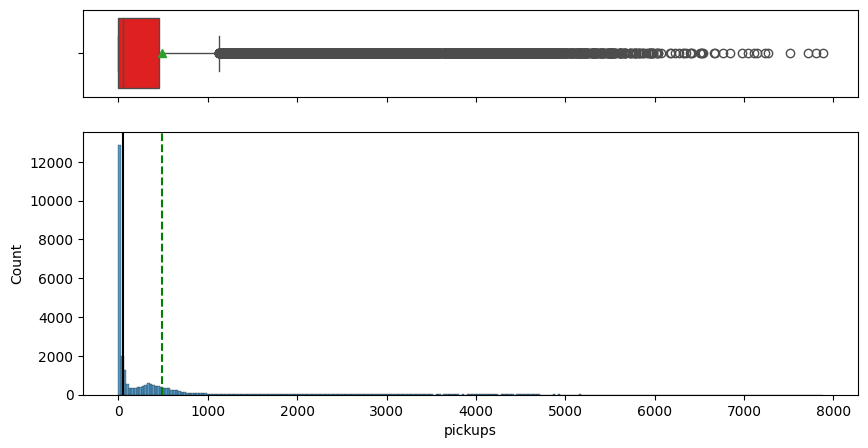

In [100]:
histogram_boxplot(df.pickups)

* The variable 'pickups' is highly right-skewed.
* Most values of 'pickups' are close to zero.
* The median of 'pickups' is 0, while the mean is approximately 500.
* The variable 'pickups' contains many outliers.
* The values of 'pickups' range from 0 to 8000.


### **Observations on Visibility**

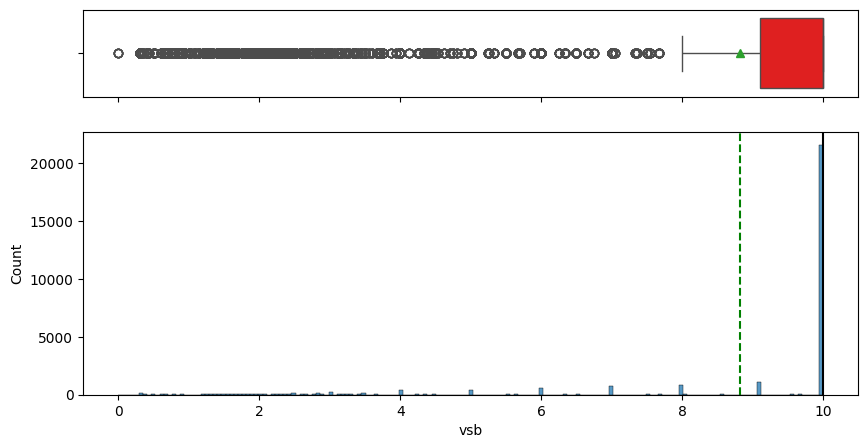

In [101]:
histogram_boxplot(df.vsb)

* The variable 'visibility' is left-skewed.
* Both the mean and median of 'visibility' are high.
* There are outliers in 'visibility' with extremely low values.

### **Observations on Snow Depth**

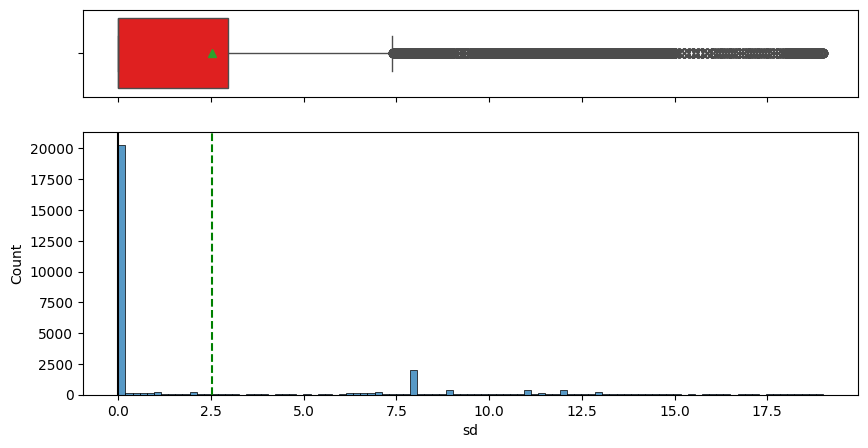

In [102]:
histogram_boxplot(df.sd)

* The dataset indicates snowfall within the analyzed period.
* The variable 'sd' (snow depth) contains outliers.

### **Exploring the categorigal data**

In [103]:
# The function will give us a bar plot of the categorigal data with a percentage

def bar_perc(data, z):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (10, 5))

    # Convert the column to a categorical data type
    data[z] = data[z].astype('category')

    ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage

    plt.show()                                                      # Display the plot

### **Observations on holiday**

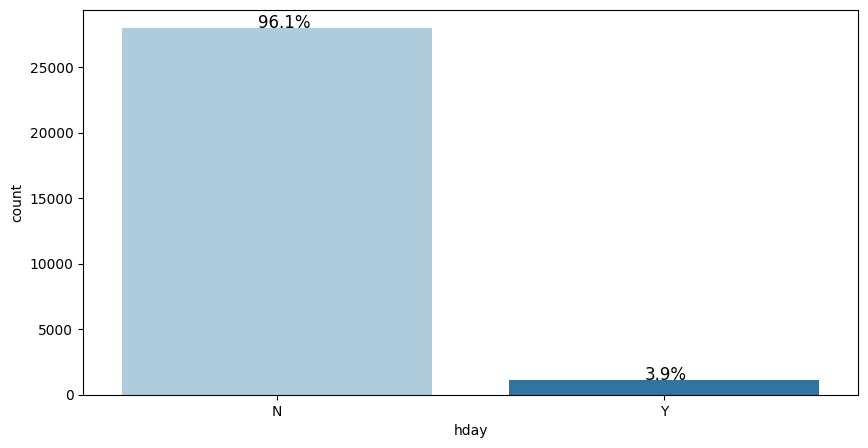

In [104]:
bar_perc(df, 'hday')

* Only 3.9% of days were holidays in the period that we are analyzing.


### **Observations on borough**

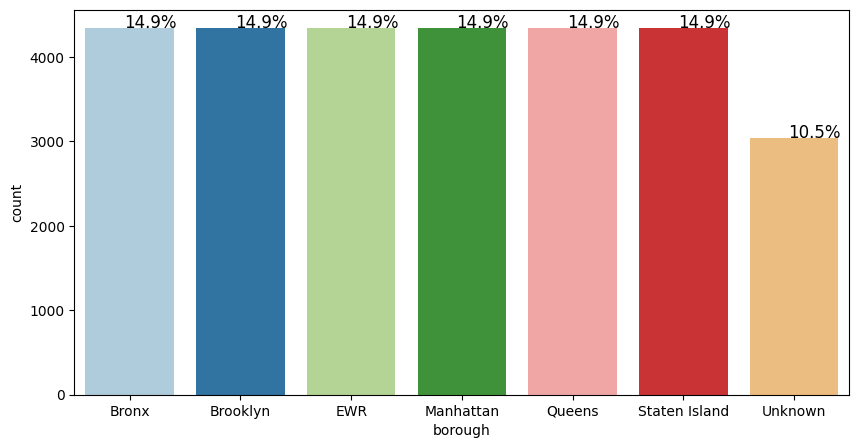

In [105]:
bar_perc(df, 'borough')

* The variable 'borough' shows a uniform distribution across all categories except for the 'Unknown' category.

## **Exploratory Data Analysis: Multivariate**

### **Correlation**

<Axes: >

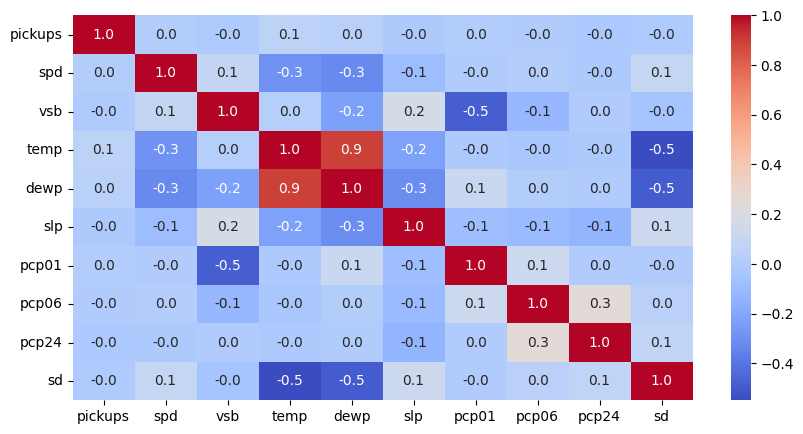

In [106]:
# Check for correlation among numerical variables
corr = df[['pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd']].corr()

# Plot the heatmap
plt.figure(figsize = (10, 5))
sns.heatmap(corr, annot = True, cmap = 'coolwarm',
        fmt = ".1f",
        xticklabels = corr.columns,
        yticklabels = corr.columns)

* 'dewp' (dew point) and 'temp' (temperature) are highly correlated, aligning with the expected relationship between humidity and temperature.
* 'vsb' (visibility) is negatively correlated with precipitation variables ('pcp01', 'pcp06', 'pcp24'), reflecting that higher rainfall leads to lower visibility.
* 'sd' (snow depth) is negatively correlated with 'temp', as expected.
* 'spd' (wind speed) and 'slp' (sea level pressure) are negatively correlated with 'temp'.
* There appears to be no strong relationship between 'pickups' and weather-related variables.

### **Relationship between pickups and time based variables**

#### **Pickups across Months**

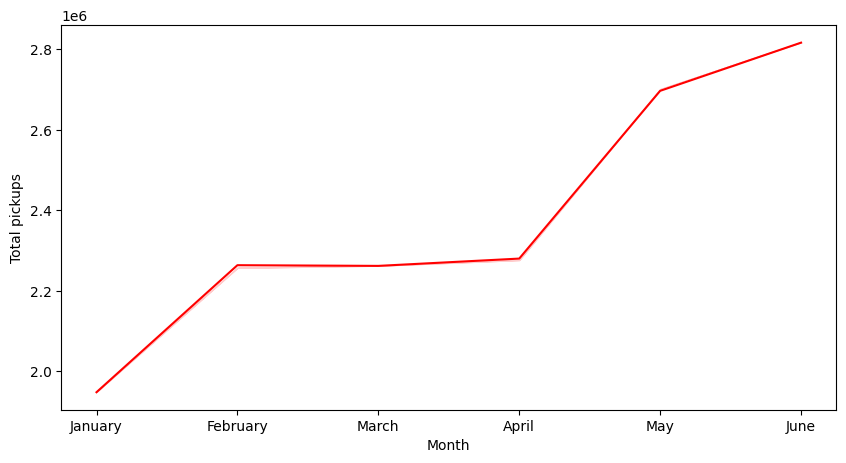

In [107]:
# Extracts all unique month
cats = df.start_month.unique().tolist()

# Turning the variable into categories, ordered by month
df.start_month = pd.Categorical(df.start_month, ordered = True, categories = cats)

#Plot the figure
plt.figure(figsize = (10, 5))
sns.lineplot(x = "start_month", y = "pickups", data = df, ci = 0, color = "RED", estimator = 'sum')
plt.ylabel('Total pickups')
plt.xlabel('Month')
plt.show()



* There is a clear increasing trend in monthly bookings over time.
* Bookings in June are approximately 1.5 times higher than in January.

#### **Pickups vs Days of the Month**

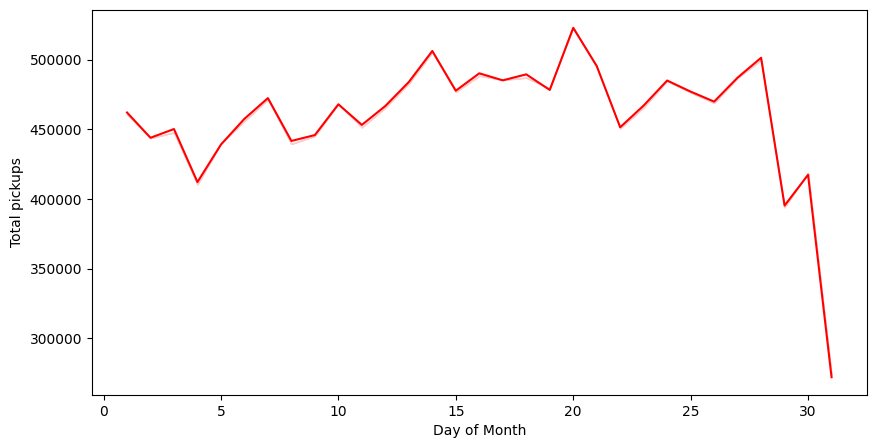

In [108]:
plt.figure(figsize = (10, 5))
sns.lineplot(x = "start_day", y = "pickups", estimator = 'sum', ci = 0, data = df, color = "RED")
plt.ylabel('Total pickups')
plt.xlabel('Day of Month')
plt.show()

* The variable 'pickups' shows lower values towards the end of the month (29th - 31st).
* The low values for the 31st may be due to not all months having 31 days.
* There is a peak in the variable 'pickups' around the 20th of the month.

#### **Pickups across Weekdays**

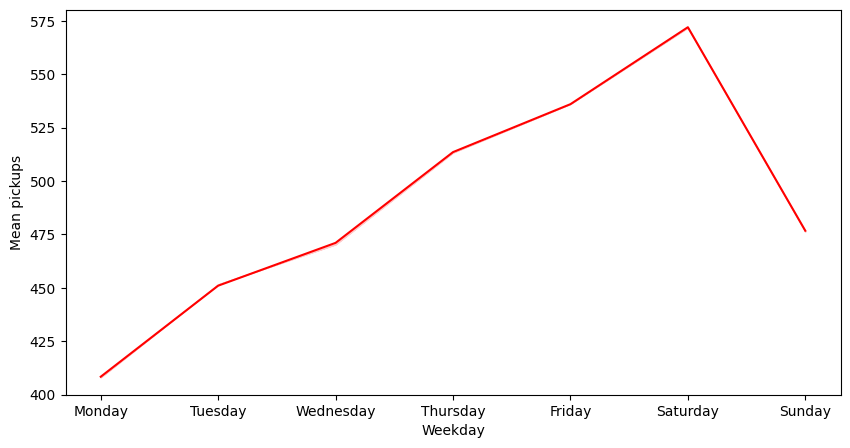

In [109]:
# Create a category list for the days of the week
cats = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
df.week_day = pd.Categorical(df.week_day, ordered = True, categories = cats)

# Plot figure
plt.figure(figsize = (10, 5))
sns.lineplot(x = "week_day", y = "pickups", ci = 0, data = df, color = "RED")
plt.ylabel('Mean pickups')
plt.xlabel('Weekday')
plt.show()

* The variable 'pickups' gradually increases as the week progresses, peaking before 'Saturday' and decreasing after.
* There is a lower demand in the beginning of the week. It needs further investigation.

### **Pickups across Boroughs**

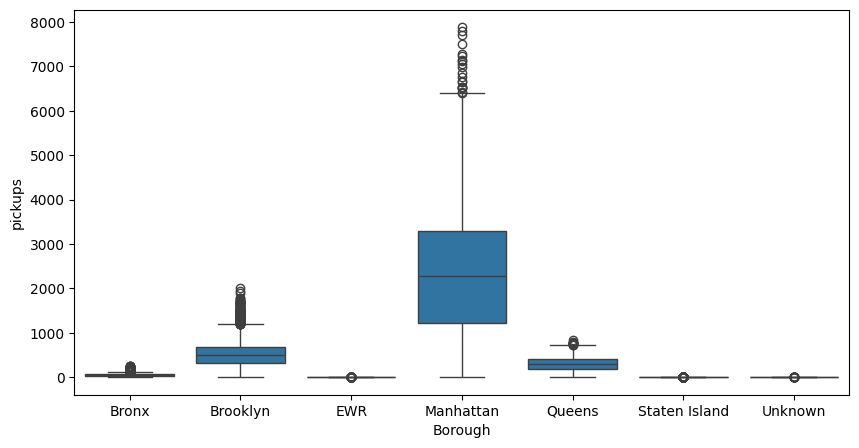

In [110]:
plt.figure(figsize = (10, 5))
sns.boxplot(x='borough', y='pickups', data=df)
plt.ylabel('pickups')
plt.xlabel('Borough')
plt.show()

* The variable 'borough' significantly impacts 'pickups'.
* 'Manhattan' has the highest 'pickups'.
* 'Brooklyn' and 'Queens' have the second and third highest 'pickups', respectively, but are notably lower than 'Manhattan'.
* 'EWR', 'Unknown', and 'Staten Island' have very few 'pickups', potentially serviceable by inbound trips from other boroughs.

### **Relationship between Pickups and Holidays**

In [111]:
df.groupby('hday')['pickups'].mean()

hday
N    492.339957
Y    437.199822
Name: pickups, dtype: float64

In [112]:
# Check across boroughs
df.groupby(by = ['borough','hday'])['pickups'].mean()

borough        hday
Bronx          N         50.771073
               Y         48.065868
Brooklyn       N        534.727969
               Y        527.011976
EWR            N          0.023467
               Y          0.041916
Manhattan      N       2401.302921
               Y       2035.928144
Queens         N        308.899904
               Y        320.730539
Staten Island  N          1.606082
               Y          1.497006
Unknown        N          2.057456
               Y          2.050420
Name: pickups, dtype: float64

* Mean 'pickups' are lower on holidays than non-holidays.
* 'Manhattan' is the only borough with a significant difference in mean 'pickups' between holidays and non-holidays.
* In 'Queens', mean 'pickups' are slightly higher on holidays.
* 'EWR' has very low 'pickups' regardless of holiday status.

### **Relationship between Pickups and Hour of the day across Boroughs**

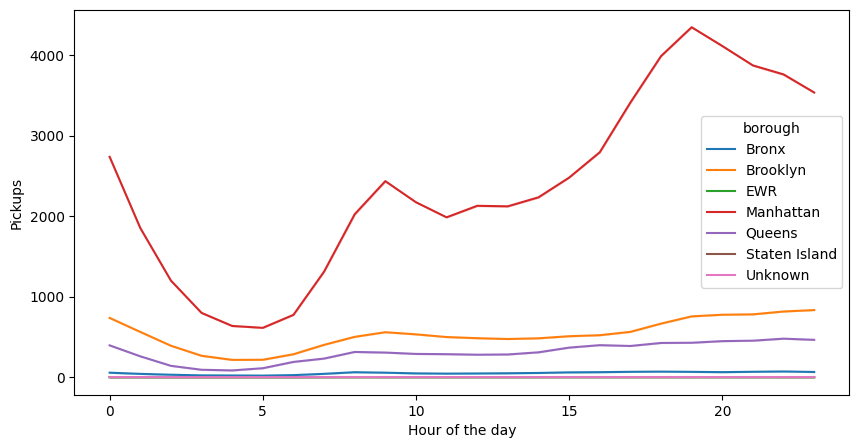

In [113]:
plt.figure(figsize = (10, 5))
sns.lineplot(x = "start_hour", y = "pickups", ci = 0, data = df, hue = 'borough')
plt.ylabel('Pickups')
plt.xlabel('Hour of the day')
plt.show()

* 'Pickups' peak between 7 PM and 8 PM , potentially due to people leaving workplaces, and decrease until 5 AM.
* From 5 AM, 'pickups' increase until 10 AM, possibly due to the morning commute.
* 'Pickups' then decrease from 10 AM to 12 PM before increasing again.
* 'Manhattan' dominates in 'pickups' compared to other boroughs.
* Due to low counts, the distribution of 'pickups' in 'EWR' and 'Staten Island' is not visible in this plot. A logarithmic scale may improve visualization.


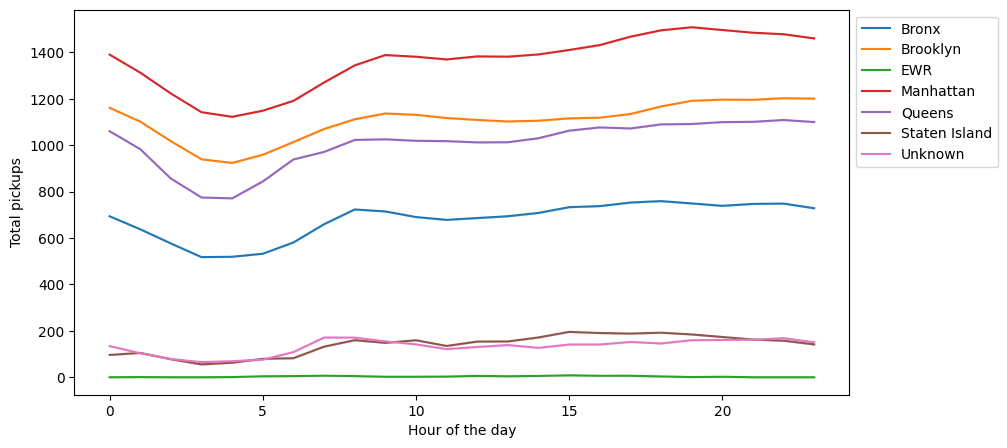

In [114]:
# Same graph as above but on log scale
plt.figure(figsize = (10, 5))
sns.lineplot(x = df.start_hour, y = np.log1p(df.pickups), estimator ='sum', ci = 0, hue = df.borough)
plt.ylabel('Total pickups')
plt.xlabel('Hour of the day')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

* An hourly pattern is observed in most 'boroughs'.
* After log transformation, the four major boroughs exhibit a similar hourly 'pickups' pattern.
* 'EWR' demand appears random, with most values at zero.
* 'Manhattan' has the highest 'pickups', warranting further investigation.

### **Manhattan Pickups Heatmap - Weekday vs Hour**

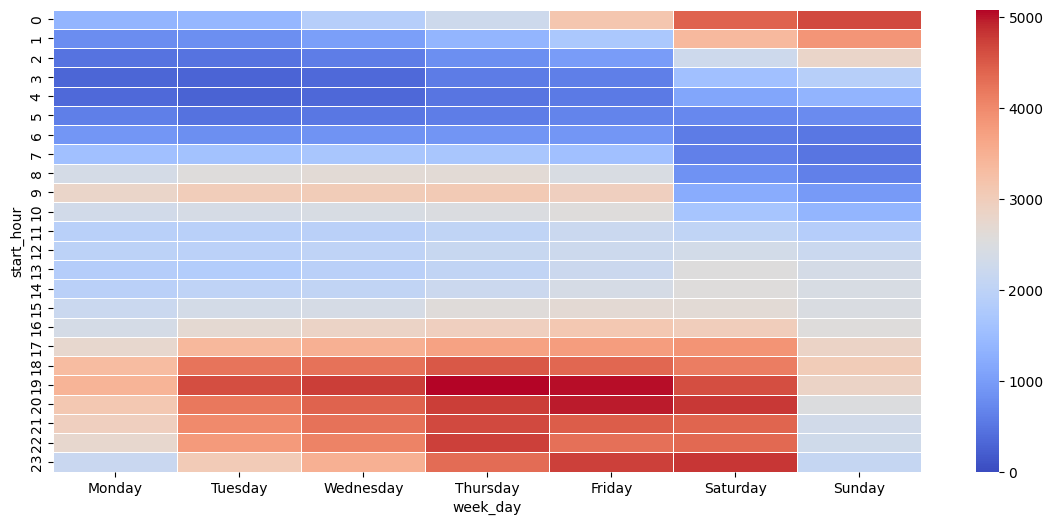

In [115]:
# Select the borough
df_man = df[df.borough == 'Manhattan']

# Create a Pivot table to make the heatmap
df_hm = df_man.pivot_table(index = 'start_hour', columns = 'week_day', values = 'pickups')

# Draw the heatmap
plt.figure(figsize = (14, 6))
sns.heatmap(df_hm,  fmt = "d", cmap = 'coolwarm', linewidths = .5, vmin = 0)
plt.show()

* The demand for Uber peaks during the late hours of the day when people are returning home from the office.
* Demand continues to be high during the late hours of the day (midnight) on Fridays and Saturdays.  
* It is odd that the demand for Uber is not as high on Monday evenings in comparison to other working days.

## **Conclusion and Recommendations**

---

### **Conclusion**

---

We analyzed a dataset of hourly Uber pickups from New York boroughs. The data spans the first six months of the year 2015. The main interest is analyze the number of pickups. It's inneficient to have cars roaming areas during low demand and lacking during periods of high. We investigated the factors that affect pickup and their nature.

We have concluded that:

* 'Manhattan' has the highest demand for 'pickups'.
* Weather conditions do not significantly impact 'pickups'.
* 'Pickups' show a steady increase from January to June.
* Weekends have higher 'pickups' than weekdays.
* High 'pickups' during evenings and consistent demand from 6 AM to 10 AM suggest Uber is used for both leisure and commuting.
* Peak 'pickup' demand occurs at 7-8 PM.
* Further investigation is needed to understand the low demand on Mondays.

---

### **Recommendations**

---

* 'Manhattan' is Uber's most mature market, while 'Brooklyn', 'Queens', and 'Bronx' show growth potential.
* 'Pickups' show a gradual increase over recent months, requiring sustained momentum.
* High 'pickup' demand during peak weekday commutes and late Saturday evenings necessitates sufficient availability.
* Saturday nights have the highest 'pickup' demand, requiring maximum availability.
* To optimize fleet allocation, obtain fleet size data to assess demand-supply and build a machine learning model for hourly 'pickup' prediction.
* Get pricing data to build a model for optimal price prediction.





